In [164]:
import pandas as pd
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv"
df = pd.read_csv(url)
df


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.570000,25.55°C,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.690000,25.55°C,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.390000,25.55°C,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.490000,25.55°C,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.170000,25.55°C,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,11/2/2022,6.030091,25.55°C,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1
2496,2497,Citarum,Wangisagara,11/3/2022,6.176031,25.55°C,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2
2497,2498,Citarum,Koyod,11/4/2022,7.776482,25.55°C,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2
2498,2499,Citarum,Setelah IPAL Cisirung,11/5/2022,7.047090,25.55°C,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2


In [165]:
df['Class'].value_counts()

Class
2    1496
1     948
3      39
4      17
Name: count, dtype: int64

### Sekilas dilihat, sebagian besar data numerik, dan data yang non-numerik hanya merupakan nama atau identifier unik lainnya.

In [166]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


### Kita akan drop beberapa fitur yang tidak berpengaruh kepada kelas output, seperti fitur Nama, Waktu (tanggal), dan Titik Pantau. Dengan ini, kita hanya menggunakan fitur numerik

In [167]:
df = df.drop(columns=['NamaSungai', 'TitikPantau', 'Waktu', 'O2'])

In [168]:
df['Temp'].value_counts()

Temp
25.55°C    2500
Name: count, dtype: int64

### Karena fitur Temp berbentuk string (non-numerik), maka kita ubah terlebih dahulu menjadi tipe numerik

In [169]:
df['Temp'] = df['Temp'].str.split('°C').str[0].astype(float)
df['Temp'].value_counts()


Temp
25.55    2500
Name: count, dtype: int64

### Kita akan lakukan pengecekan null

In [170]:
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   pH             2500 non-null   float64
 2   Temp           2500 non-null   float64
 3   TSS            2500 non-null   float64
 4   DO             2500 non-null   float64
 5   BOD            2500 non-null   float64
 6   COD            2500 non-null   float64
 7   Nitrat         2500 non-null   float64
 8   FecalColiform  2500 non-null   float64
 9   Fosfat         2500 non-null   float64
 10  IP             2500 non-null   float64
 11  Class          2500 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 234.5 KB


No               0
pH               0
Temp             0
TSS              0
DO               0
BOD              0
COD              0
Nitrat           0
FecalColiform    0
Fosfat           0
IP               0
Class            0
dtype: int64

### Tidak ada baris yang null, maka lanjut ke langkah selanjutnya

# Logistic Classification vs XGBoost vs Decision Tree

In [171]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)


In [174]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_proba_dt = decision_tree.predict_proba(X_test)


In [175]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
)

y_train_adj = y_train.copy() - 1

xgb_cls.fit(X_train, y_train_adj)

xgb_pred_adj = xgb_cls.predict(X_test)
xgb_pred = xgb_pred_adj + 1
xgb_pred_proba = xgb_cls.predict_proba(X_test)

#### Untuk training XGB Classification, data y harus diubah dulu menjadi 0, 1, 2, dst. Data aslinya mulai dari 1, oleh karena itu kita kurangi 1 saja

#### Evaluasi

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average="weighted")}")

print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba, multi_class='ovr')}")

Accuracy: 0.958
Precision: 0.9581014492753622
Recall: 0.958
F1 Score: 0.9578799711093655
ROC AUC Score: 0.9984646651519575


In [177]:
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")
print(f"XGBoost Precision: {precision_score(y_test, xgb_pred, average='weighted')}")
print(f"XGBoost Recall: {recall_score(y_test, xgb_pred, average='weighted')}")
print(f"XGBoost F1 Score: {f1_score(y_test, xgb_pred, average='weighted')}")
print(f"XGBoost ROC AUC Score: {roc_auc_score(y_test-1, xgb_pred_proba, multi_class='ovr')}")

XGBoost Accuracy: 0.996
XGBoost Precision: 0.996027027027027
XGBoost Recall: 0.996
XGBoost F1 Score: 0.9959133130253507
XGBoost ROC AUC Score: 0.9994814756387795


In [178]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Decision Tree Precision: {precision_score(y_test, y_pred_dt, average='weighted')}")
print(f"Decision Tree Recall: {recall_score(y_test, y_pred_dt, average='weighted')}")
print(f"Decision Tree F1 Score: {f1_score(y_test, y_pred_dt, average='weighted')}")
print(f"Decision Tree ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr')}")

Decision Tree Accuracy: 0.998
Decision Tree Precision: 0.9980067796610169
Decision Tree Recall: 0.998
Decision Tree F1 Score: 0.9979991402481121
Decision Tree ROC AUC Score: 0.9987554487814543


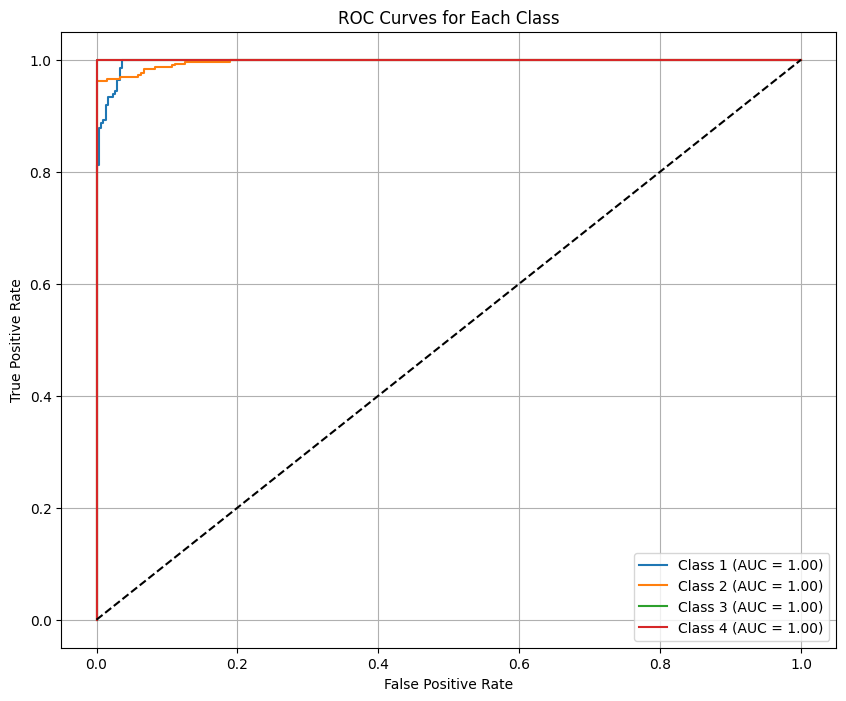

In [179]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

classes = sorted(y.unique())

for i in classes:

    y_test_bin = (y_test == i).astype(int)
    y_pred_proba_class = y_pred_proba[:, i-1]
    
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba_class)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

Garis tiap kelas berada di atas garis linear tengah, menunjukkan model sudah cukup akurat

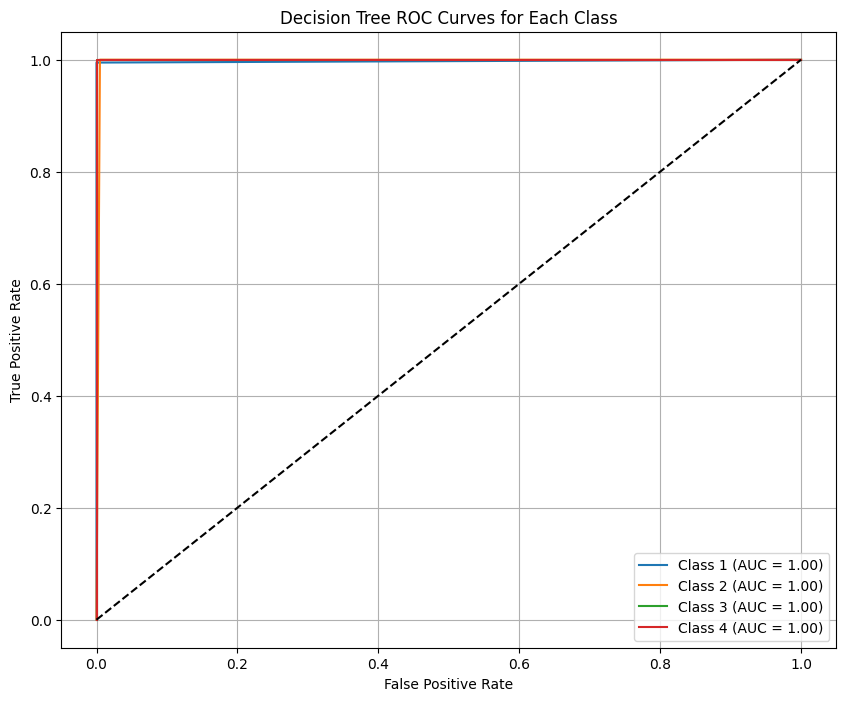

In [180]:
plt.figure(figsize=(10, 8))

classes = sorted(y.unique())

for i in classes:

    y_test_bin = (y_test == i).astype(int)
    dt_pred_proba_class = y_pred_proba_dt[:, i-1]
    
    fpr, tpr, _ = roc_curve(y_test_bin, dt_pred_proba_class)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

Model Decision Tree hampir 100 persen akurat

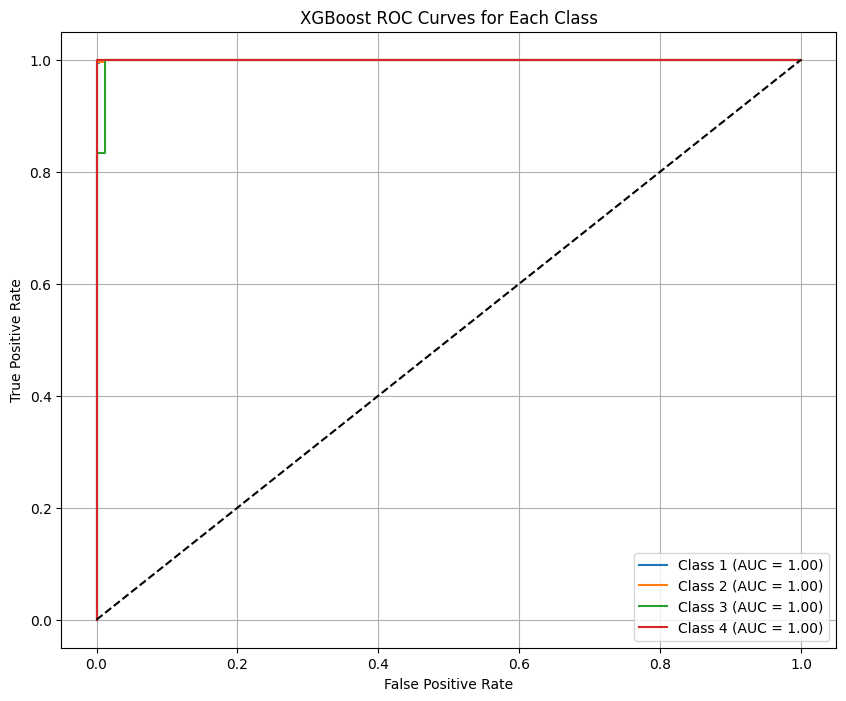

In [181]:
plt.figure(figsize=(10, 8))

classes = sorted(y.unique())

for i in classes:

    y_test_bin = (y_test == i).astype(int)
    xgb_pred_proba_class = xgb_pred_proba[:, i-1]
    
    fpr, tpr, _ = roc_curve(y_test_bin, xgb_pred_proba_class)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

Sama seperti di logistic regression, garis tiap kelas berada di atas garis linear tengah, menunjukkan model lebih akurat dibanding LogisticRegression, namun ada miss sedikit di kelas 3. XGBoost mungkin kurang akurat sedikit dibanding decision tree untuk mempertimbangkan overfitting.

# XGBoost (Extreme Gradient Boosting)

XGBoost adalah implementasi yang dioptimalkan dari algoritma Gradient Boosting. Ini adalah algoritma machine learning berbasis ensemble yang menggabungkan beberapa model lemah (biasanya decision trees) untuk membuat model yang kuat.

## Cara Kerja XGBoost:

1. **Sequential Learning**: XGBoost membangun model secara bertahap, di mana setiap model baru mencoba memperbaiki kesalahan dari model sebelumnya.

2. **Regularisasi**: XGBoost menerapkan regularisasi untuk mencegah overfitting, membuat model lebih robust.

3. **Penanganan Data yang Hilang**: XGBoost memiliki mekanisme bawaan untuk menangani nilai yang hilang.

## Kelebihan XGBoost:

- **Performa Tinggi**: Sering memenangkan kompetisi machine learning karena akurasinya yang tinggi.
- **Efisiensi**: Dioptimalkan untuk kecepatan dan penggunaan memori yang efisien.
- **Fleksibilitas**: Dapat digunakan untuk masalah regresi, klasifikasi, dan peringkat.
- **Regularisasi**: Memiliki parameter regularisasi yang membantu mencegah overfitting.

## Parameter Utama XGBoost:

- **n_estimators**: Jumlah pohon keputusan yang akan dibangun.
- **learning_rate**: Tingkat pembelajaran yang mengontrol kontribusi setiap pohon.
- **max_depth**: Kedalaman maksimum dari setiap pohon.
- **subsample**: Fraksi sampel yang digunakan untuk membangun setiap pohon.
- **colsample_bytree**: Fraksi fitur yang digunakan untuk membangun setiap pohon.

XGBoost sangat efektif untuk dataset terstruktur seperti data kualitas air Citarum yang kita analisis.


## Logistic Regression, Accuracy, Precision, Recall, F1, ROC, AUC

### 1. **Logistic Regression**
Logistic Regression adalah metode statistika untuk memodelkan probabilitas suatu kejadian berdasarkan variabel independen. Digunakan untuk klasifikasi biner (0 atau 1).

Persamaan Logistic Regression:
$$
P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$
Dimana:
- $P(Y=1)$ adalah probabilitas kelas positif.
- $X$ adalah variabel independen.
- $\beta_0, \beta_1$ adalah parameter regresi.
- $e$ adalah basis logaritma natural.

### 2. **Accuracy**
Akurasi mengukur proporsi prediksi yang benar:
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

### 3. **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar:
$$
Precision = \frac{TP}{TP + FP}
$$

### 4. **Recall (Sensitivity)**
Recall mengukur seberapa banyak sampel positif yang berhasil dideteksi:
$$
Recall = \frac{TP}{TP + FN}
$$

### 5. **F1 Score**
F1 Score adalah rata-rata harmonik antara Precision dan Recall:
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

### 6. **ROC (Receiver Operating Characteristic) Curve**
ROC adalah kurva yang menggambarkan performa model dengan memplot TPR (True Positive Rate) vs. FPR (False Positive Rate).

### 7. **AUC (Area Under Curve)**
AUC adalah luas di bawah kurva ROC yang menunjukkan seberapa baik model dalam membedakan kelas positif dan negatif.

Semakin tinggi nilai AUC (mendekati 1), semakin baik model dalam membedakan kelas.